In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.shape

(3276, 10)

In [7]:
df['ph'].shape

(3276,)

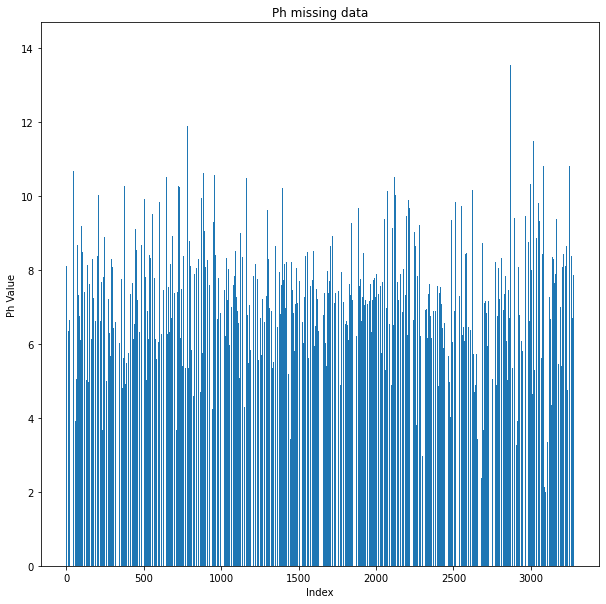

In [8]:

plt.figure(figsize=(10,10))
plt.bar([i for i in range(3276)],df['ph'])
plt.title('Ph missing data')

plt.xlabel('Index')
plt.ylabel('Ph Value')
plt.show()

## Filling NaN values using interpolate(linear) method 

In [9]:
df['ph'].interpolate(inplace=True)
df['ph'][0] = 5
df['ph'].head()

/home/adminsys/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    5.000000
1    3.716080
2    8.099124
3    8.316766
4    9.092223
Name: ph, dtype: float64

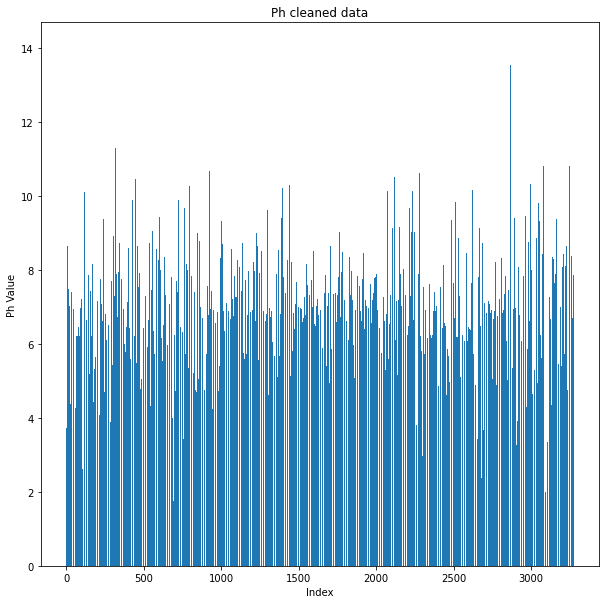

In [10]:

plt.figure(figsize=(10,10))
plt.bar([i for i in range(3276)],df['ph'])
plt.title('Ph cleaned data')

plt.xlabel('Index')
plt.ylabel('Ph Value')
plt.show()

In [11]:
df.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
df['Sulfate'].describe()

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64

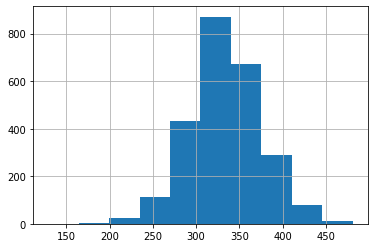

In [13]:
df['Sulfate'].hist()
plt.show()

## Replacing Sulfate NaN Values using mean 

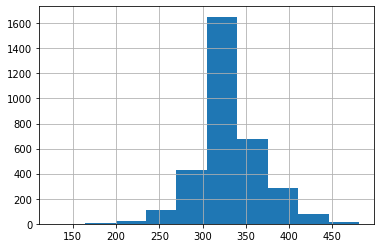

In [14]:
df['Sulfate'].fillna(df['Sulfate'].mean()).hist()
plt.show()

## Replacing Sulfate NaN Values using Interpolate Method 

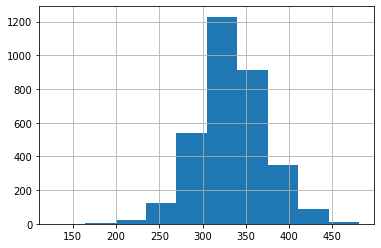

In [15]:
df['Sulfate'].interpolate().hist()
plt.show()

## As we can see Interpolate method looks more convenient than mean method 

In [16]:
df['Sulfate'].interpolate(inplace=True)

In [17]:
df.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Lets do the same procedure for  Trihalomethanes missing values

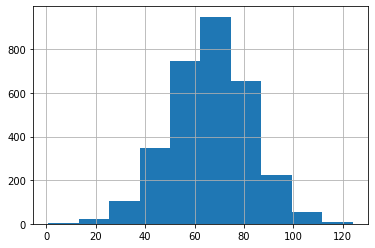

In [18]:
df['Trihalomethanes'].hist()
plt.show()

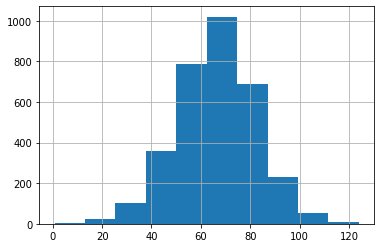

In [19]:
df['Trihalomethanes'].interpolate().hist()
plt.show()

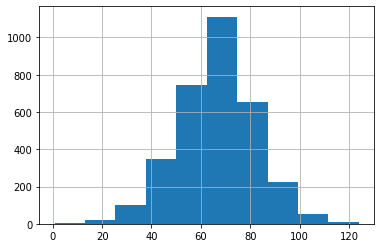

In [20]:
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean()).hist()
plt.show()

## Since Both methods are almost similar I choose interpolate method to replace missing Values 

In [21]:
df['Trihalomethanes'].interpolate(inplace=True)

In [22]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Now Data is cleaned with no missing values 

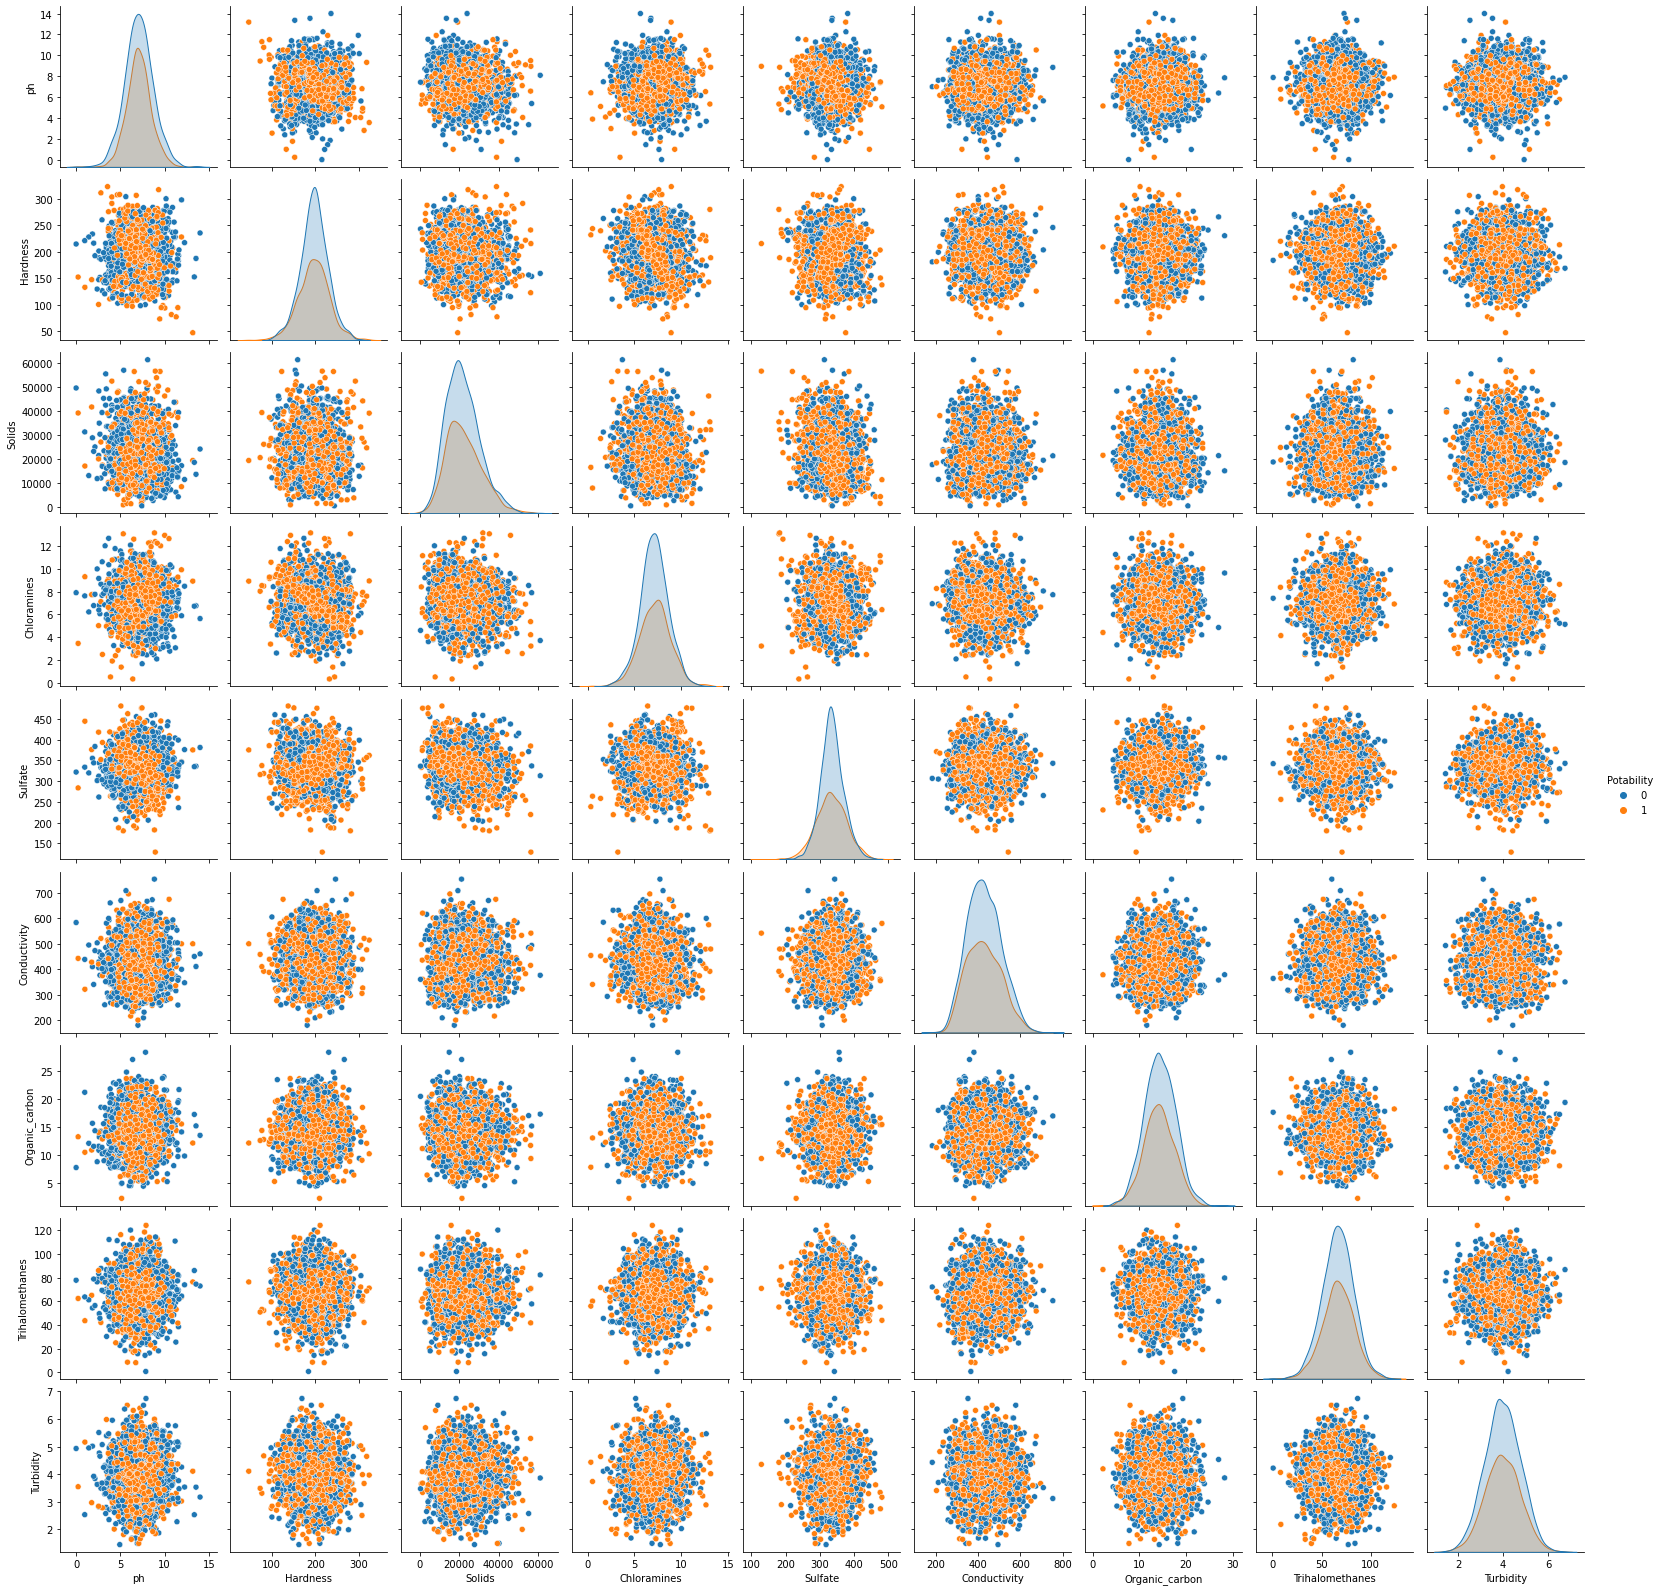

In [23]:
sns.pairplot(data=df,hue='Potability')
plt.show()

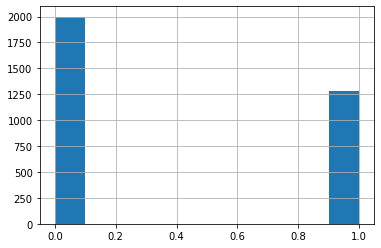

In [24]:
df['Potability'].hist()
plt.show()

In [141]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [25]:
x = df.drop(['Potability'],axis=1)
y = df['Potability']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [27]:
x_train.shape

(2293, 9)

In [28]:
x_test.shape

(983, 9)

In [29]:
y_train.shape

(2293,)

In [30]:
y_test.shape

(983,)